# Heart Disease Data Set


Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

Collect Cleveland data

In [2]:
data = pd.read_csv('processed.cleveland.data',names=['age','sex','cp','trestbps','chol','fbs',
                                                     'restecg','thalach','exang','oldpeak','slope',
                                                     'ca','thal','num'])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Data Cleaning

Change some of float values to integer for better representation.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Find missing values in the dataset

In [4]:
columns = data.columns.tolist()
for column in columns:
    if '?' in data[column].value_counts().keys():
        print(data[column].value_counts())

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64


'Ca' and 'thal' has 4 and 2 missing values respectively. We fill them by the mode of that attribute


In [5]:
data['ca'].replace('?',data['ca'].mode()[0],inplace=True)
data['thal'].replace('?',data['thal'].mode()[0],inplace=True)

In [6]:
data['age'] = data['age'].astype('int64')
data['sex'] = data['sex'].astype('int64')
data['cp'] = data['cp'].astype('int64')
data['trestbps'] = data['trestbps'].astype('int64')
data['chol'] = data['chol'].astype('int64')
data['fbs'] = data['fbs'].astype('int64')
data['restecg'] = data['restecg'].astype('int64')
data['thalach'] = data['thalach'].astype('int64')
data['exang'] = data['exang'].astype('int64')
data['slope'] = data['slope'].astype('int64')
data['ca'] = data['ca'].astype(str).astype('float64').astype('int64')
data['thal'] = data['thal'].astype(str).astype('float64').astype('int64')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Checking for duplicate rows in the dataset

In [8]:
data.duplicated().sum()

0

Getting a general idea about the data

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# Data Visualization

Here, we will get more inference about the dataset for better understanding

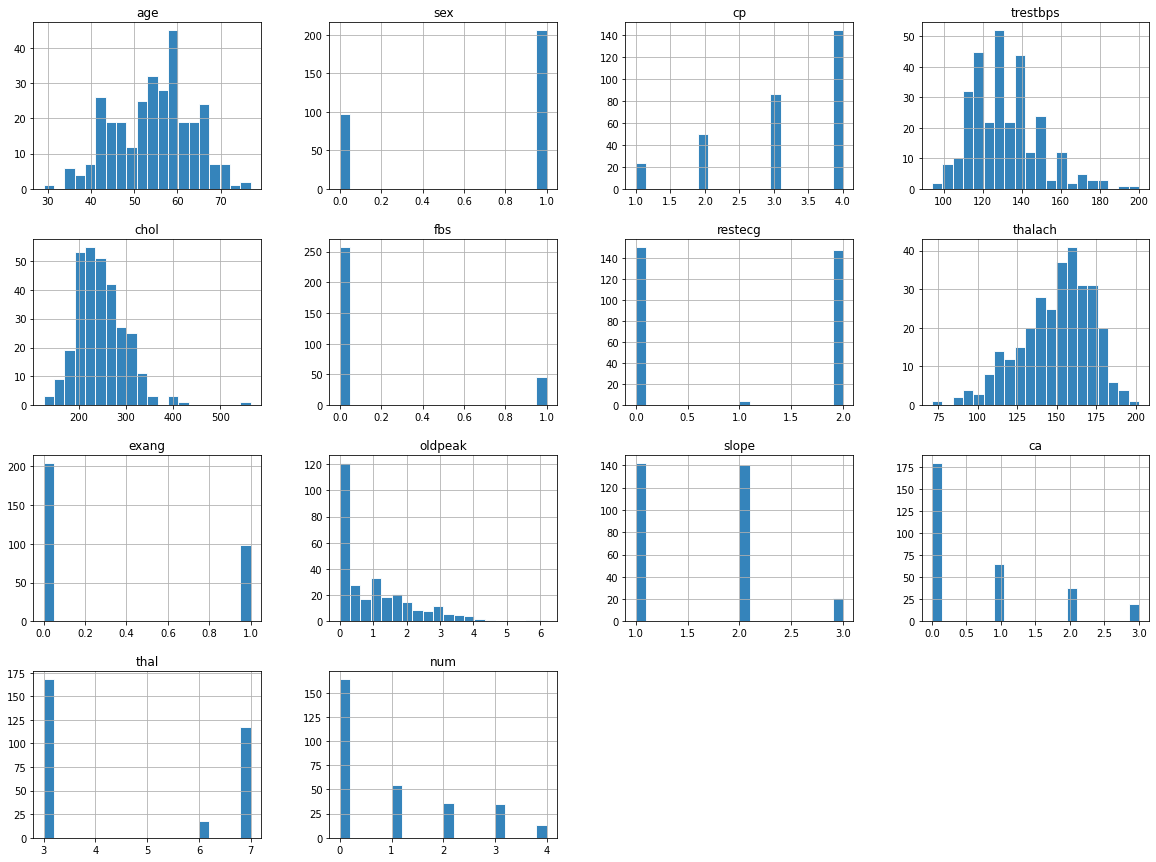

In [10]:
data.hist(figsize = (20,15),ec='white',bins=20,alpha=0.9)
plt.show()

age, trestbps are normally distributed <br/>
chol is almost normally distributed <br/>
oldpeak is left-skewed <br/>
thalac is right skewed <br/>

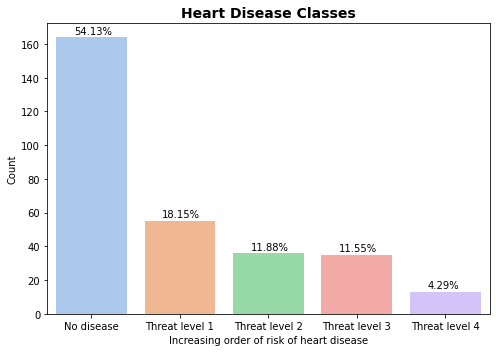

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sb.countplot(x="num", data=data, palette="pastel")
ax.set_title("Heart Disease Classes", fontsize = 14, weight = 'bold')
plt.xlabel("Increasing order of risk of heart disease")
plt.ylabel("Count")
name = ["No disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"]
ax.set_xticklabels (name, rotation = 0)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+2,
            str(round((i.get_height()/total)*100, 2))+'%')  
plt.tight_layout()
plt.show()

54.13% of patients are healthy and 45.87% of patients have some sort of threat to heart disease.

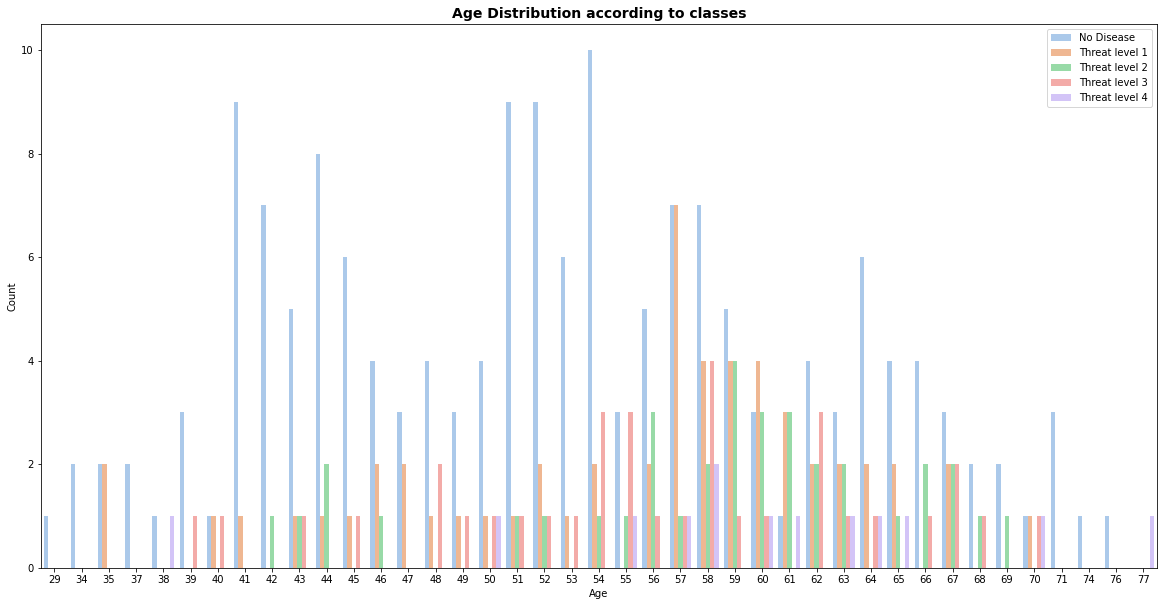

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sb.countplot(x="age", hue="num", data=data, palette="pastel")
ax.set_title("Age Distribution according to classes", fontsize = 14, weight = 'bold')
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["No Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"],loc='upper right')
plt.show()

We see that most people who are suffering are of the age of 58, followed by 57. Majorly, people belonging to the age group 50+ are suffering from the disease.

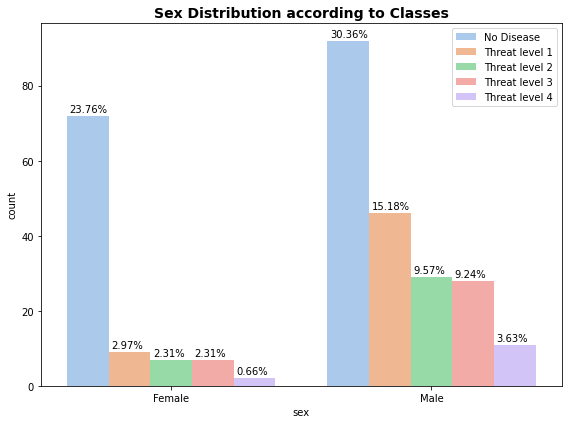

Female patients: 32.01%
Male patients: 67.99%


In [13]:
fig, ax = plt.subplots(figsize=(8,6))
name = ["Female","Male"]
ax = sb.countplot(x='sex', hue='num', data=data, palette='pastel')
ax.set_title("Sex Distribution according to Classes", fontsize = 14, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.01, i.get_height()+1,
            str(round((i.get_height()/total)*100, 2))+'%')  
plt.tight_layout()
plt.legend(["No Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
plt.show()

female = len(data[data.sex == 0])
male = len(data[data.sex == 1])
total = len(data.num)
print(f'Female patients: {(female/total)*100:0.2f}%')
print(f'Male patients: {(male/total)*100:0.2f}%')

According to this Cleveland dataset males are more susceptible to get Heart Disease than females

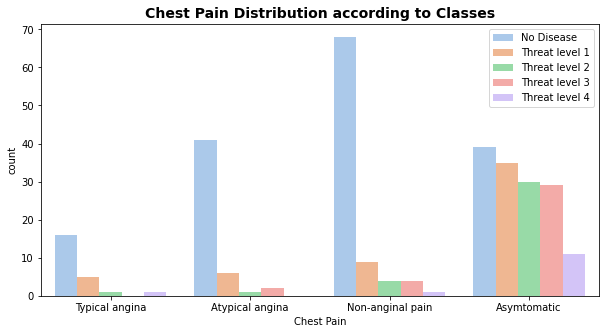

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
name = ["Typical angina", "Atypical angina", "Non-anginal pain" ,"Asymtomatic"]
ax = sb.countplot(x='cp', hue='num', data=data, palette='pastel')
ax.set_title("Chest Pain Distribution according to Classes", fontsize = 14, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
plt.xlabel("Chest Pain")
plt.legend(["No Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
plt.show()

Chest pain (cp) or angina is a type of discomfort caused when heart muscle doesn’t receive enough oxygen rich blood, which triggered discomfort in arms, shoulders, neck, etc.

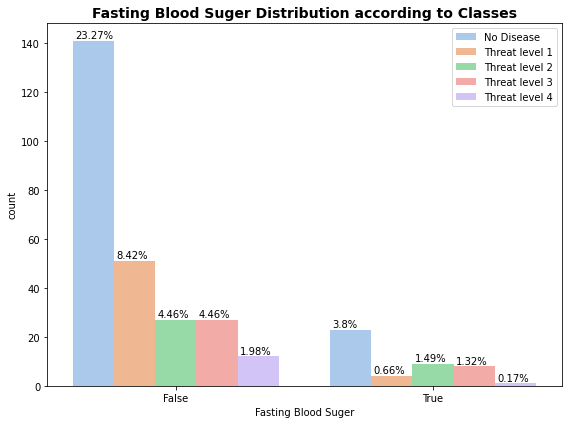

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
name = ["False","True"]
ax = sb.countplot(x='fbs', hue='num', data=data, palette='pastel')
ax.set_title("Fasting Blood Suger Distribution according to Classes", fontsize = 14, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
plt.xlabel("Fasting Blood Suger")
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.01, i.get_height()+1,
            str(round((i.get_height()/total)*100, 2))+'%')  
    
plt.legend(["No Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
plt.tight_layout()
plt.show()

Fasting blood sugar or fbs is a diabetes indicator with fbs >120 mg/d is considered diabetic (True class). Here, we observe that the number for class true, is lower compared to class false.

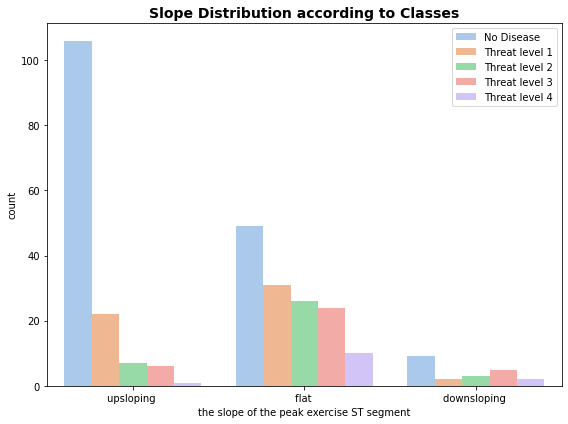

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
name = ["upsloping ","flat ","downsloping "]
ax = sb.countplot(x='slope', hue='num', data=data, palette='pastel')
ax.set_title("Slope Distribution according to Classes", fontsize = 14, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
plt.xlabel("the slope of the peak exercise ST segment")    
plt.legend(["No Disease","Threat level 1","Threat level 2","Threat level 3","Threat level 4"])
plt.tight_layout()
plt.show()

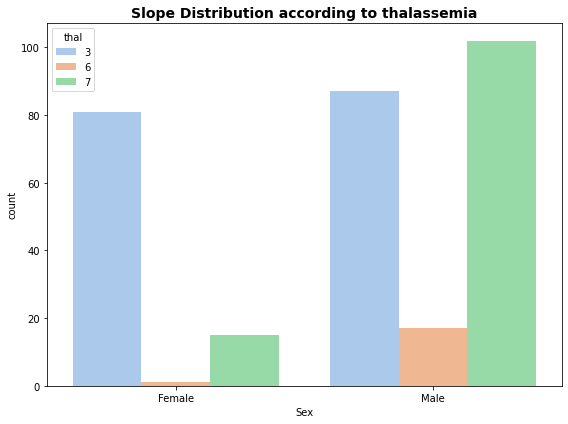

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sb.countplot(x='sex', hue='thal', data=data, palette='pastel')
ax.set_title("Slope Distribution according to thalassemia", fontsize = 14, weight = 'bold')
name = ["Female","Male"]
ax.set_xticklabels (name, rotation = 0)
plt.xlabel("Sex")    
plt.tight_layout()
plt.show()

In [18]:
temp_data = data.copy()
for i in range(0,len(data)):
    if temp_data.num[i] == 0:
        temp_data.drop(labels=i,axis=0,inplace=True)
temp_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


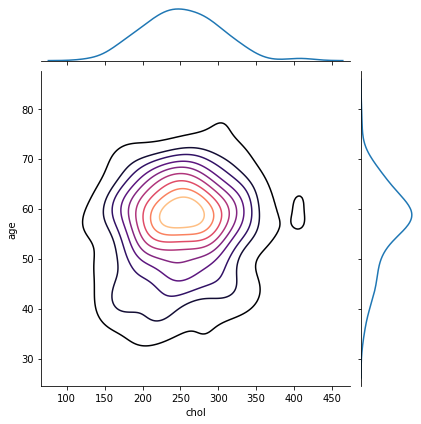

In [24]:
sb.jointplot(data=temp_data, x='chol', y='age', kind='kde', cmap='magma')
plt.show()

As observed from the above plot we can see that most of the Heart diseased patients in their age of upper 50s or lower 60s tend to have Cholesterol between 200 mg/dl to 300 mg/dl.

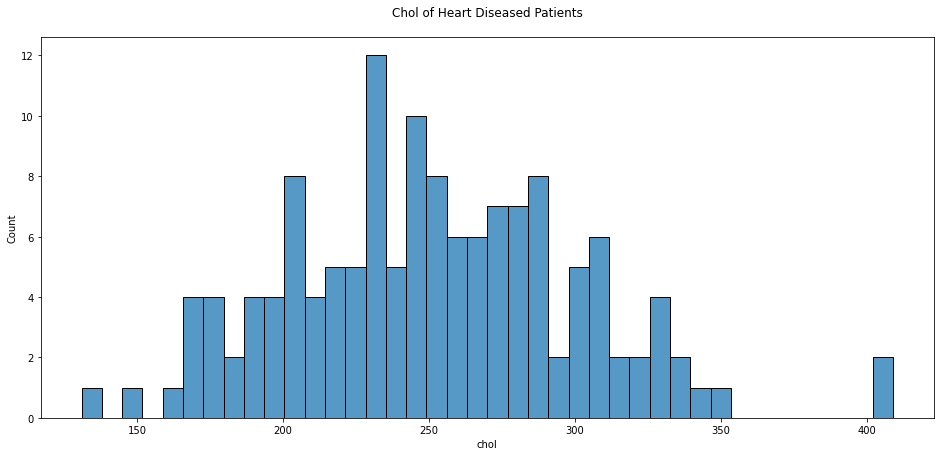

In [20]:
plt.figure(figsize=(16,7))
sb.histplot(temp_data['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')
plt.show()

In adults, the total cholesterol levels are considered desirable less than 200 milligram per decilitre ( mg / dL). Borderlines are considered to be high between 200 to 239 mg / dL and 240 mg / dL and above. 

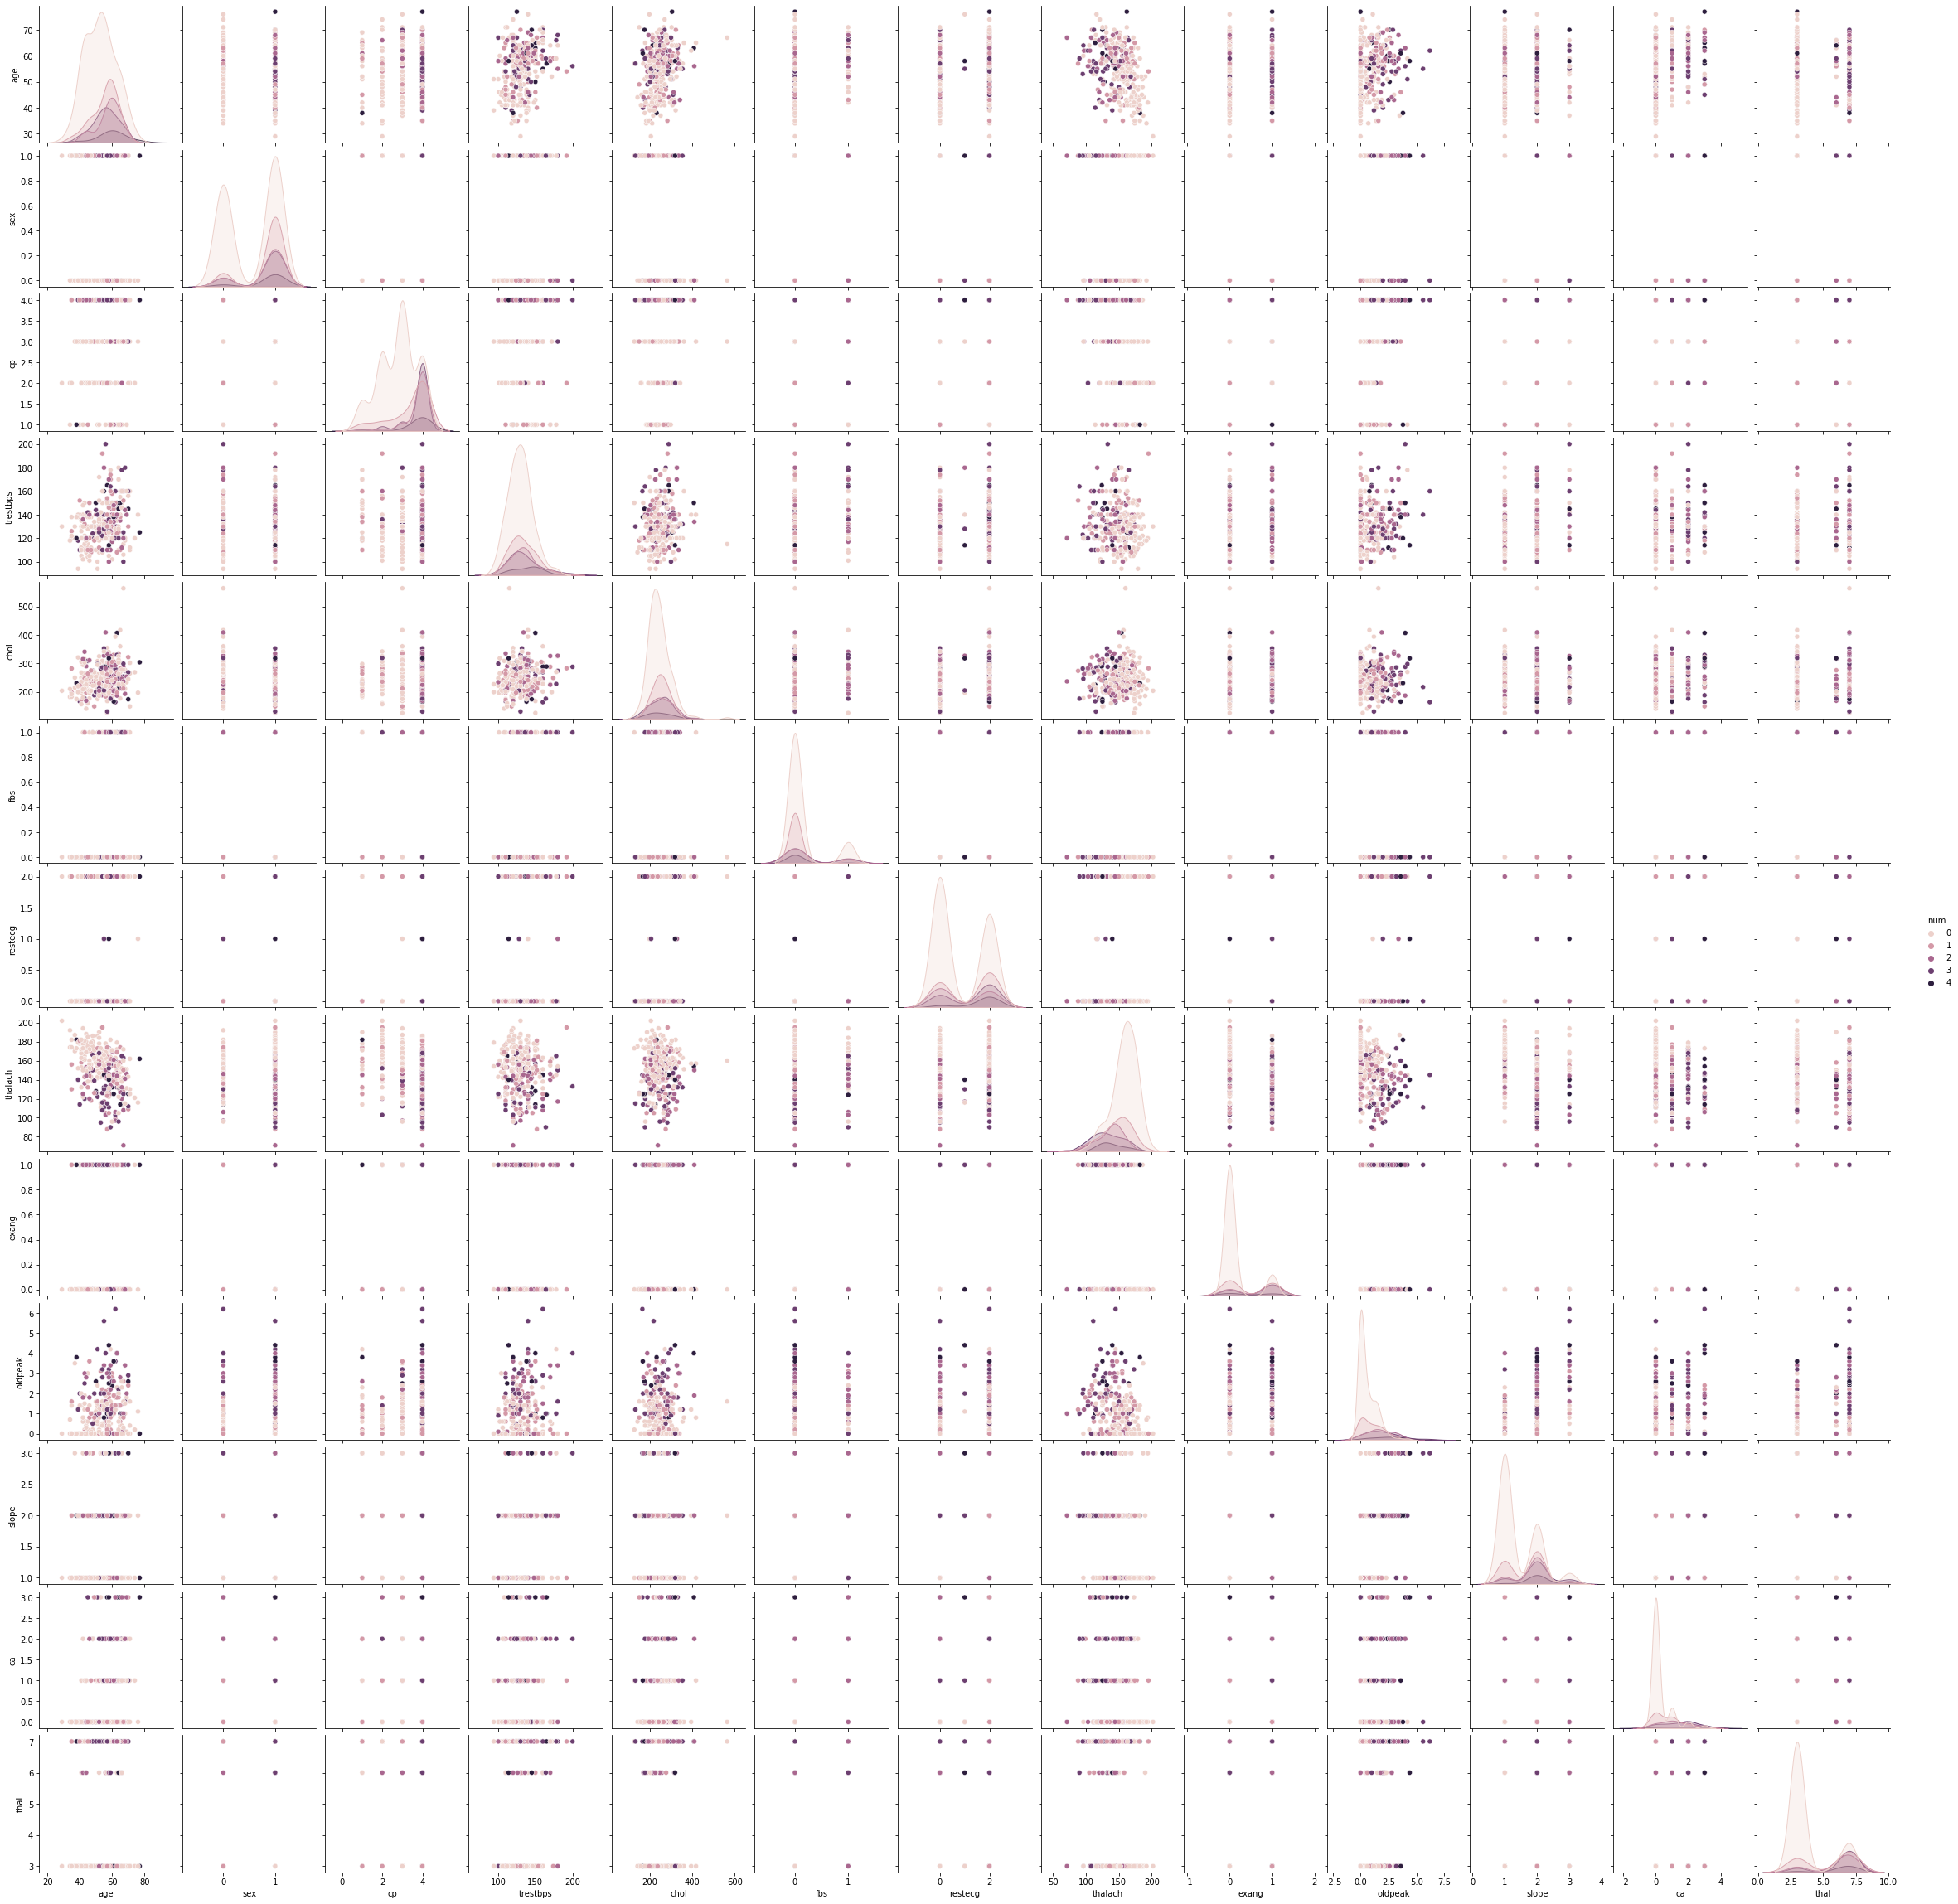

In [21]:
sb.pairplot(data,hue="num")

oldpeak having a linear separation relation between disease and non-disease. <br/>
thalach having a mild separation relation between disease and non-disease. <br/>
Other features don’t form any clear separation. <br/>


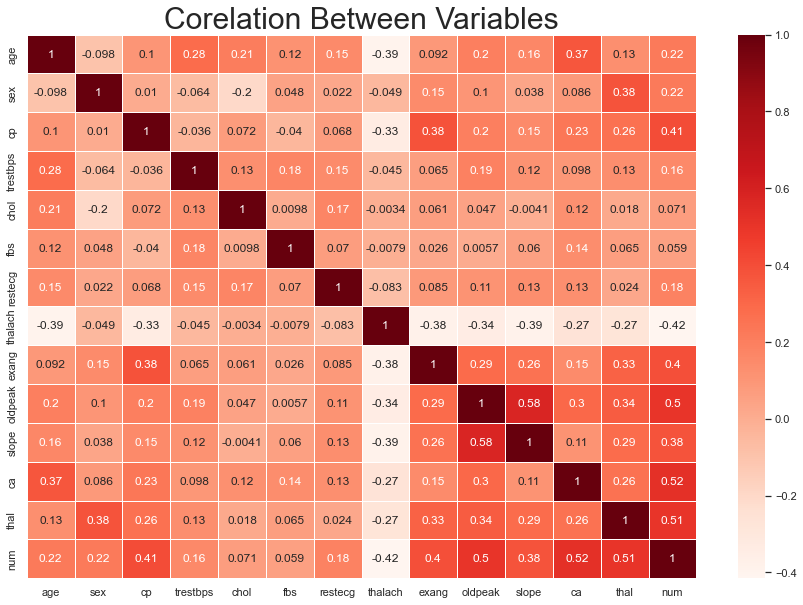

In [25]:
sb.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sb.heatmap(data.corr(), annot = True, linewidths=.5, cmap="Reds")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

‘cp’, ‘thalach’, ‘slope’ show a good positive correlation with the target. <br/>
‘oldpeak’, ‘exang’, ‘ca’, ‘thal’, ‘sex’, ‘age’ shows a good negative correlation with target. <br/>
‘fbs’ ‘chol’, ‘trestbps’, ‘restecg’ have low correlation with our target. <br/>
